### [Intuition] Test how the algorithm reacts to differetly scaled input

Investigate numerical stability... just from plain eyesight, this does not seem to affect the hypothesis in the constant case. 

In [1]:
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from active_learning.evaluation import *

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Constant: 0.01


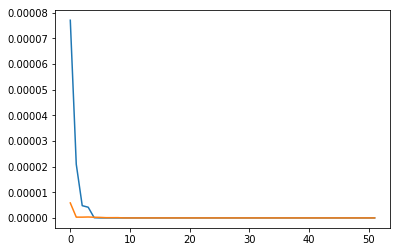

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Constant: 0.02


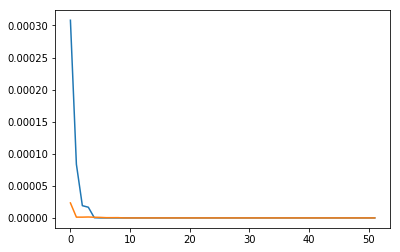

Constant: 1


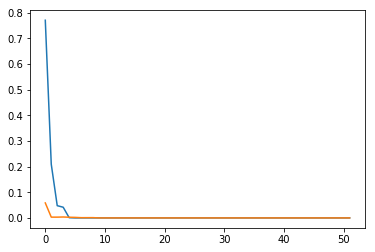

Constant: 2


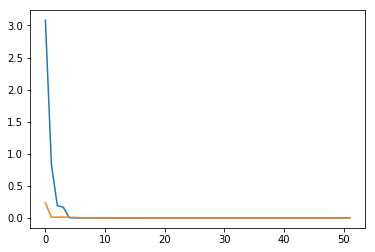

Constant: 4


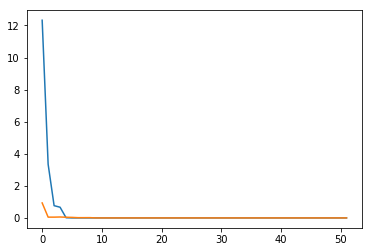

Constant: 8


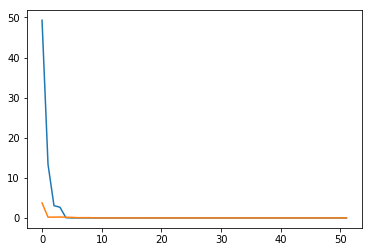

Constant: 16


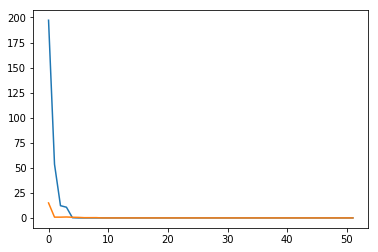

Constant: 32


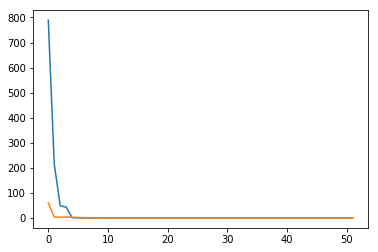

Constant: 64


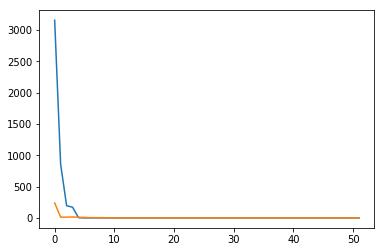

In [3]:
# rate according to different constant values

algorithm = UncertaintySamplingAlgorithm
algo_params_length = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'length'}}
algo_params_tfidf = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'tfidf'}}

def rating_func_constant(c):
    return lambda x: c

for c in [0.01,0.02,1,2,4,8,16,32,64]:
    rating_func = rating_func_constant(c)
    stats_length = Evaluator(algorithm=algorithm, algo_params=algo_params_length,
                     oracle=FunctionalOracle, oracle_params={'rating_func':rating_func},
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    stats_tfidf = Evaluator(algorithm=algorithm, algo_params=algo_params_tfidf,
                     oracle=FunctionalOracle, oracle_params={'rating_func':rating_func},
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    print("Constant: {}".format(c))
    stats_length['mse'].plot()
    stats_tfidf['mse'].plot()
    plt.show()

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Constant: 0.01


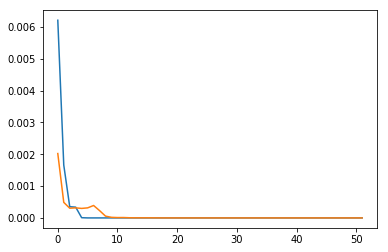

Constant: 0.02


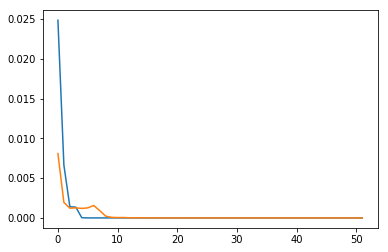

Constant: 1


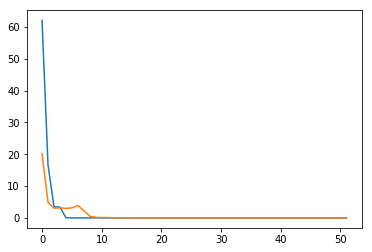

Constant: 2


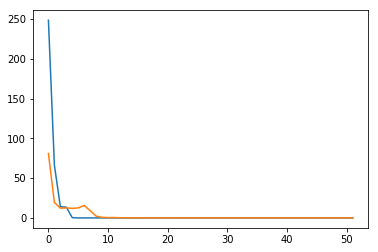

Constant: 4


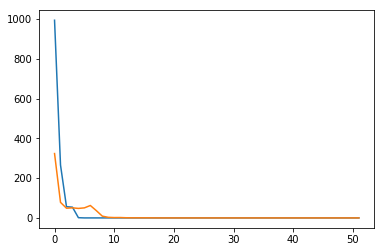

Constant: 8


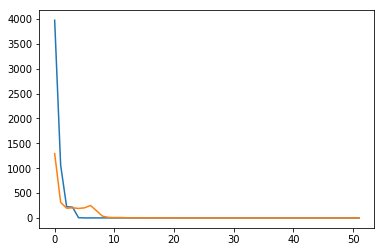

Constant: 16


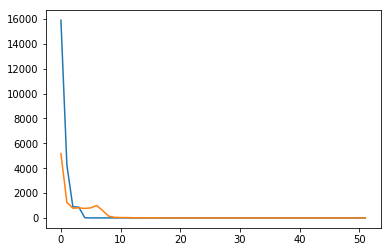

Constant: 32


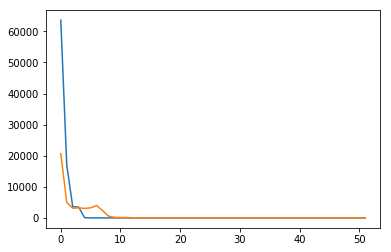

Constant: 64


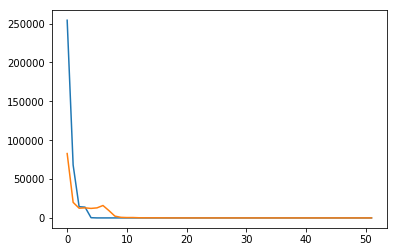

In [4]:
# rate according to the length of the path multiplied by a constant

algorithm = UncertaintySamplingAlgorithm
algo_params_length = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'length'}}
algo_params_tfidf = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'tfidf'}}

def rating_func_length_for_constant(c):
    return lambda x: len(x) * c

for c in [0.01,0.02,1,2,4,8,16,32,64]:
    rating_func = rating_func_length_for_constant(c)
    stats_length = Evaluator(algorithm=algorithm, algo_params=algo_params_length,
                     oracle=FunctionalOracle, oracle_params={'rating_func':rating_func},
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    stats_tfidf = Evaluator(algorithm=algorithm, algo_params=algo_params_tfidf,
                     oracle=FunctionalOracle, oracle_params={'rating_func':rating_func},
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    print("Constant: {}".format(c))
    stats_length['mse'].plot()
    stats_tfidf['mse'].plot()
    plt.show()